<h1> Machine learning project on customer segmentation <h1>
<h4> Group members: Carucci Matteo, Agudio Tommaso, Natoli Vittorio Alessandro </h4>

Starting Point: EDA and some data cleansing.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import scipy.cluster.hierarchy as sch
import altair as alt 
%matplotlib inline
plt.ion()
df = pd.read_csv('customer_segmentation.csv')
df.drop(columns = 'customer_unique_id',inplace= True)
df.columns





Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'payment_type', 'payment_installments', 'payment_value',
       'customer_city', 'customer_state', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'seller_city', 'seller_state', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_category_name_english'],
      dtype='object')

Now we want to see which columns contains categorical values, so that we will be able to use OneHotEncoder on those columns

In [2]:
#Checking the features that are categorical

categorical_features = df.select_dtypes(include='O').keys()

#Displaying those features

categorical_features

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'payment_type', 'customer_city', 'customer_state', 'product_id',
       'seller_id', 'shipping_limit_date', 'seller_city', 'seller_state',
       'product_category_name', 'product_category_name_english'],
      dtype='object')

As we want to get a dataset which is as essential as possible, we find some features that are not of any particular interest for both data exploration and analysis. These will be:
<ul> 
<li>  'product_name_lenght' </li>
<li>  'product_description_lenght' </li>
<li> 'shipping_limit_date' </li>




We want to use OneHotEncoder only on the unique features, because otherwise we would get a non-sense giant dataset with thousands of columns.

In [3]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

transformer = make_column_transformer(
    (OneHotEncoder(sparse= False), ['order_status','payment_type', 'customer_city', 'customer_state', 'seller_city','seller_state', 'product_category_name','product_category_name_english']),
    remainder='passthrough')

encoded_df = transformer.fit_transform(df)
encoded_df = pd.DataFrame(
    encoded_df, 
    columns=transformer.get_feature_names()
)

encoded_df.head()




c:\Users\39339\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


onehotencoder__x0_canceled onehotencoder__x0_delivered  \
0                        0.0                         1.0   
1                        0.0                         1.0   
2                        0.0                         1.0   
3                        0.0                         1.0   
4                        0.0                         1.0   

  onehotencoder__x0_invoiced onehotencoder__x0_processing  \
0                        0.0                          0.0   
1                        0.0                          0.0   
2                        0.0                          0.0   
3                        0.0                          0.0   
4                        0.0                          0.0   

  onehotencoder__x0_shipped onehotencoder__x1_boleto  \
0                       0.0                      1.0   
1                       0.0                      0.0   
2                       0.0                      1.0   
3                       0.0                      0.0   
4                       0.0                      0.0   

  onehotencoder__x1_credit_card onehotencoder__x1_debit_card  \
0                           0.0                          0.0   
1                           1.0                          0.0   
2                           0.0                          0.0   
3                           1.0                          0.0   
4                           1.0                          0.0   

  onehotencoder__x1_voucher onehotencoder__x2_abaete  ...  \
0                       0.0                      0.0  ...   
1                       0.0                      0.0  ...   
2                       0.0                      0.0  ...   
3                       0.0                      0.0  ...   
4                       0.0                      0.0  ...   

  payment_installments payment_value order_item_id  \
0                    1        141.46             1   
1                    5        135.82             1   
2                    1        128.04             1   
3                    2         279.3             1   
4                    2         279.3             2   

                         product_id                         seller_id  \
0  595fac2a385ac33a80bd5114aec74eb8  289cdb325fb7e7f891c38608bf9e0962   
1  595fac2a385ac33a80bd5114aec74eb8  289cdb325fb7e7f891c38608bf9e0962   
2  595fac2a385ac33a80bd5114aec74eb8  289cdb325fb7e7f891c38608bf9e0962   
3  595fac2a385ac33a80bd5114aec74eb8  289cdb325fb7e7f891c38608bf9e0962   
4  595fac2a385ac33a80bd5114aec74eb8  289cdb325fb7e7f891c38608bf9e0962   

   shipping_limit_date  price freight_value product_name_lenght  \
0  2018-07-30 03:24:27  118.7         22.76                  29   
1  2018-08-13 14:31:29  116.9         18.92                  29   
2  2018-07-13 03:45:45  118.7          9.34                  29   
3  2018-08-23 10:50:54  116.9         22.75                  29   
4  2018-08-23 10:50:54  116.9         22.75                  29   

  product_description_lenght  
0                        178  
1                        178  
2                        178  
3                        178  
4                        178  

[5 rows x 2326 columns]

Using pandas 'get_dummies' instead of OHE

In [4]:
dummies_df = pd.get_dummies(df, columns = ['order_status','payment_type', 'customer_city', 'customer_state', 'seller_city','seller_state', 'product_category_name','product_category_name_english'])

dummies_df.head()



order_id                       customer_id  \
0  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
1  86674ccaee19790309333210917b2c7d  1b338293f35549b5e480b9a3d7bbf3cd   
2  aee682982e18eb4714ce9f97b15af5e2  8858442ea4d5dc5bb9e118e8f728095d   
3  d543201a9b42a1402ff97e65b439a48b  971bf8f42a9f8cb3ead257854905b454   
4  d543201a9b42a1402ff97e65b439a48b  971bf8f42a9f8cb3ead257854905b454   

  order_purchase_timestamp    order_approved_at order_delivered_carrier_date  \
0      2018-07-24 20:41:37  2018-07-26 03:24:27          2018-07-26 14:31:00   
1      2018-08-09 11:37:35  2018-08-09 14:35:19          2018-08-10 14:34:00   
2      2018-07-09 18:46:28  2018-07-11 03:45:45          2018-07-11 15:01:00   
3      2018-08-21 10:00:25  2018-08-21 10:50:54          2018-08-22 15:21:00   
4      2018-08-21 10:00:25  2018-08-21 10:50:54          2018-08-22 15:21:00   

  order_delivered_customer_date order_estimated_delivery_date  \
0           2018-08-07 15:27:45           2018-08-13 00:00:00   
1           2018-08-14 18:51:47           2018-08-22 00:00:00   
2           2018-07-12 18:14:35           2018-07-18 00:00:00   
3           2018-08-28 18:58:22           2018-09-10 00:00:00   
4           2018-08-28 18:58:22           2018-09-10 00:00:00   

   payment_installments  payment_value  order_item_id  ...  \
0                     1         141.46              1  ...   
1                     5         135.82              1  ...   
2                     1         128.04              1  ...   
3                     2         279.30              1  ...   
4                     2         279.30              2  ...   

  product_category_name_english_pet_shop  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

  product_category_name_english_signaling_and_security  \
0                                                  0     
1                                                  0     
2                                                  0     
3                                                  0     
4                                                  0     

  product_category_name_english_small_appliances  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   product_category_name_english_small_appliances_home_oven_and_coffee  \
0                                                  0                     
1                                                  0                     
2                                                  0                     
3                                                  0                     
4                                                  0                     

   product_category_name_english_sports_leisure  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   product_category_name_english_stationery  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   product_category_name_english_tablets_printing_image  \
0                                                  0      
1                                                  0      
2                                                  0      
3                                                  0      
4                                                  0      

   product_category_name_e

RFM analysis: RFM stands for Frequency (The frequency of purchases of a customer), Recency (How long has been since the last purchace of a customer), Monetary (How much a customer has spent). We will firstly calculate the frequency and generate a new dataset containg 2 columns (CustomerName and Frequency). Note that we will use the original dataframe because we don't need any of the categorical features in order to calculate the RFM values.

In [5]:
frequencies = df.groupby(
    by=['customer_id'], as_index=False)['order_purchase_timestamp'].count()
frequencies.columns = ['Frequencies Customer ID', 'Frequency']
frequencies.head()

Frequencies Customer ID  Frequency
0  001051abfcfdbed9f87b4266213a5df1          3
1  0013cd8e350a7cc76873441e431dd5ee          1
2  0015bc9fd2d5395446143e8b215d7c75          1
3  0018c09f333634ca9c80d9ff46e43e9c          1
4  001df1ee5c36767aa607001ab1a13a06          1

Creating the monetary dataset:

In [6]:
df['Orders_value'] = df['payment_value']
monetary = df.groupby(by='customer_id', as_index=False)['Orders_value'].sum()
monetary.columns = [' Monetary Customer ID', 'Monetary value']
monetary.head()

Monetary Customer ID  Monetary value
0  001051abfcfdbed9f87b4266213a5df1           65.20
1  0013cd8e350a7cc76873441e431dd5ee           92.60
2  0015bc9fd2d5395446143e8b215d7c75          132.19
3  0018c09f333634ca9c80d9ff46e43e9c           56.87
4  001df1ee5c36767aa607001ab1a13a06           42.86

Creating the recency dataset (note that the INT value containted in the 'recency' column shows the number of days since the last purchase of a user)

In [7]:
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])

recency = df.groupby(by='customer_id',
                        as_index=False)['order_purchase_timestamp'].max()

recency.columns = ['Customer ID', 'Latest Purchase']

recent_date = recency['Latest Purchase'].max()

recency['Recency'] = recency['Latest Purchase'].apply(
    lambda x: (recent_date - x).days)
    
recency.head()


Customer ID     Latest Purchase  Recency
0  001051abfcfdbed9f87b4266213a5df1 2018-05-30 09:19:31       91
1  0013cd8e350a7cc76873441e431dd5ee 2018-05-07 23:25:09      113
2  0015bc9fd2d5395446143e8b215d7c75 2018-06-11 19:48:34       78
3  0018c09f333634ca9c80d9ff46e43e9c 2018-07-01 18:07:57       58
4  001df1ee5c36767aa607001ab1a13a06 2018-08-05 23:14:45       23

After that we have created the three different dataframe we want to concatenate them in order to have a single, clean and understanble dataset.

In [8]:
rfm_dataset = None

rfm_dataset = pd.DataFrame(rfm_dataset)

rfm_dataset = pd.concat([recency,monetary,frequencies], axis = 1)

cols = [3,5]

rfm_dataset = rfm_dataset.drop(rfm_dataset.columns[cols],axis = 1)



#scaling the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc = MinMaxScaler()
sc_features = rfm_dataset.copy() 



new = sc.fit_transform(sc_features['Monetary value'].array.reshape(-1,1))
new2 = sc.fit_transform(sc_features['Recency'].array.reshape(-1,1))
#new3 = sc.fit_transform(sc_features['Frequency'].array.reshape(-1,1))
sc_features['Monetary value'] = new
sc_features['Recency'] = new2 
#sc_features['Frequency'] = new3
sc_features.head()





Customer ID     Latest Purchase   Recency  \
0  001051abfcfdbed9f87b4266213a5df1 2018-05-30 09:19:31  0.189189   
1  0013cd8e350a7cc76873441e431dd5ee 2018-05-07 23:25:09  0.234927   
2  0015bc9fd2d5395446143e8b215d7c75 2018-06-11 19:48:34  0.162162   
3  0018c09f333634ca9c80d9ff46e43e9c 2018-07-01 18:07:57  0.120582   
4  001df1ee5c36767aa607001ab1a13a06 2018-08-05 23:14:45  0.047817   

   Monetary value  Frequency  
0        0.001764          3  
1        0.002706          1  
2        0.004067          1  
3        0.001478          1  
4        0.000996          1

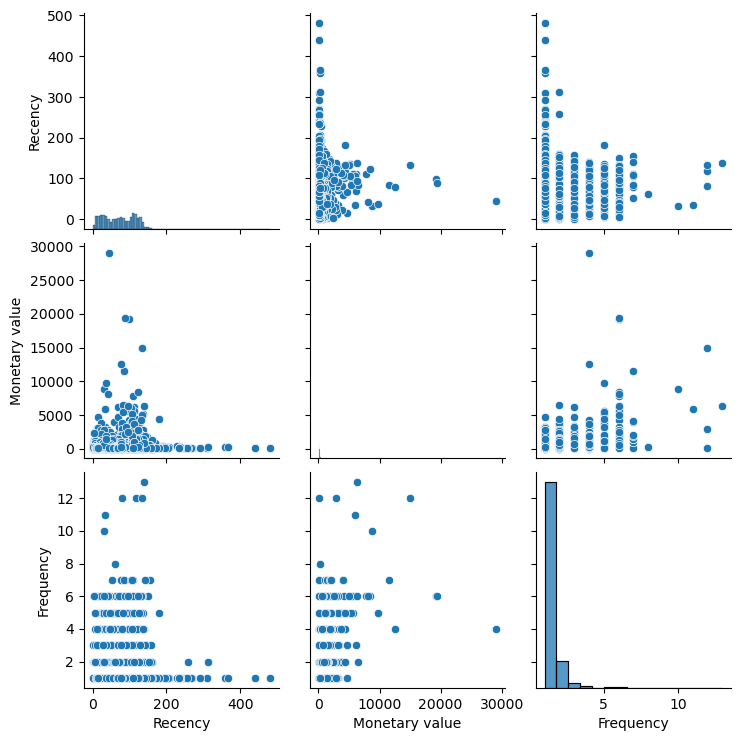

In [9]:
columns = list(rfm_dataset.columns)
pair2 = sns.pairplot(rfm_dataset[columns]) 

Let us see whether some variables are correlated and hence there exists some relationships among them.

In [10]:
rfm_dataset.describe()

Recency  Monetary value     Frequency
count  11394.000000    11394.000000  11394.000000
mean      72.950939      235.406362      1.211252
std       42.707211      599.372953      0.668045
min        0.000000       13.890000      1.000000
25%       34.000000       66.945000      1.000000
50%       73.000000      119.430000      1.000000
75%      110.000000      213.047500      1.000000
max      481.000000    29099.520000     13.000000

As we can see people buy with an average frequence of 1 as it can be easily seen also some lines below in a straightforward histogram.

In [11]:
# are these feature correlated?
rfm_dataset.corr()


Recency  Monetary value  Frequency
Recency         1.000000        0.030302   0.034568
Monetary value  0.030302        1.000000   0.484253
Frequency       0.034568        0.484253   1.000000

## Distribution



### Pairplot

To see and understand better the dataset, we now calculate the pairplot and see the various correlation between the different columns. We will start by seeing if there exists some correlation among products and payments.

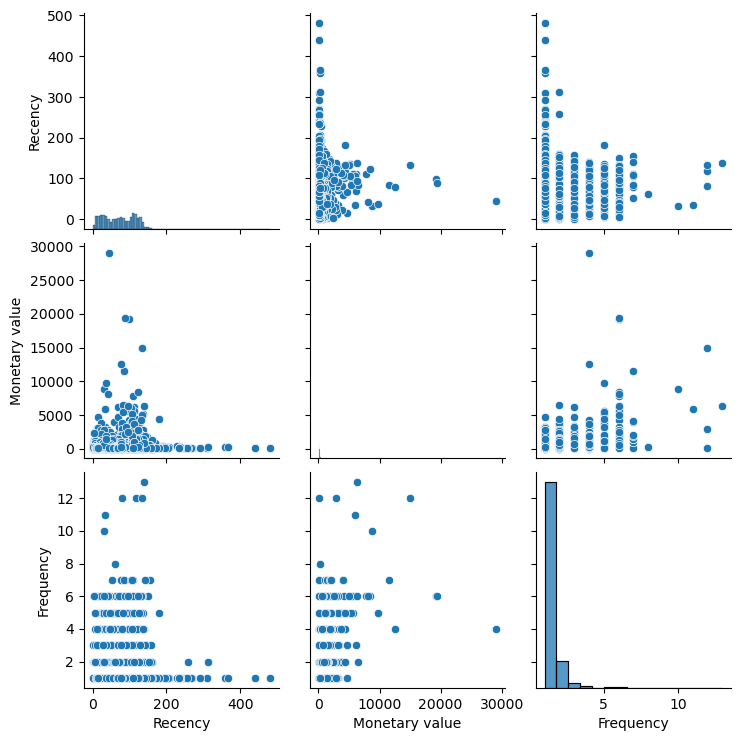

In [12]:
#pairplot in new RFm dataset
sns.pairplot(rfm_dataset)

As one can easily notice from the pairplot above there's a clear trend: customers who have purchased more recently spend more and more frequently. They're likely to be usual clients and those who have bought products in the past 200 hundred days are likely to be unsatisfied and have decided not to buy anymore.

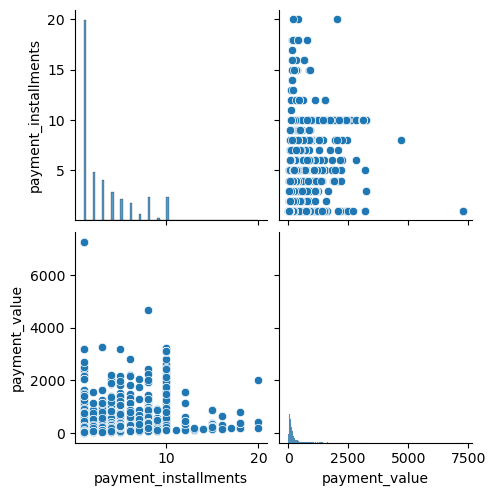

In [13]:
columns=["payment_type","payment_installments","payment_value","customer_state","product_category_name_english"]
sns.pairplot(df[columns])


We will start with the k-means algorithm for clustering. First thing first we need to define the optimal amount of cluster to pass to our algorithm in order to minimize the within sum of clusters squares that is, to minimize the distance among datapoints in a cluster to get better communities: In particular, choosing the right number of clusters maximize the distance among clusters.

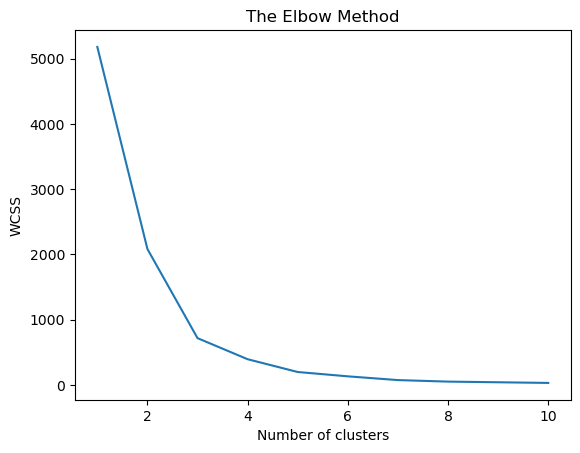

In [14]:
from sklearn.cluster import KMeans 
def elbow_method():
    features = ['Recency','Monetary value','Frequency']
    #X = rfm_dataset[features]
    wcss = []

    X = sc_features[features]

    for i in range(1, 11):
        kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)

    plt.plot(range(1, 11), wcss)
    plt.title('The Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()

    return X 

X = elbow_method()



From the elbow method we can see that either 4 and 5 are the best number of clusters. In order to make sure that we will pick the best among all, we use Gridsearch to better interpret and tune the parameters: number of clusters, clustering algorithm and number of iterations for centroids are to be tuned in K-means!

In [15]:
from sklearn.model_selection import GridSearchCV 

params = {
    'algorithm': ['lloyd','elkan'],
    'n_init' : [i for i in range(1,15)],
    'n_clusters' : [i for i in range(3,6)]

}

kmeans =  KMeans()
clf = GridSearchCV(estimator = kmeans, param_grid= params).fit(X)



cv_results = pd.DataFrame(clf.cv_results_)
#display(cv_results)

print(f"The top parameters to tune into Kmeans are: {clf.best_params_}")


The top parameters to tune into Kmeans are: {'algorithm': 'lloyd', 'n_clusters': 5, 'n_init': 4}


As we can see the parameters likely to produce better results are 'elkan' as algorithm and the number of clusters as well as algorithm iterations set to 5. We can now retry to fit the model with these hypertuned parameters.
If one wants to see the results choosing the arbitrary but still appropriate parameters, can use the class below which shows the results for all parameters we tune.

In [18]:

import plotly.graph_objs as go  #import pylot for 3d objects!
#doing a class that allows to change hyperparameters!
class Kmeanscust():

    def __init__(self,clusters1,algorithm1,rand_state,X, df):
        self.clusters1 = clusters1  
        self.algorithm1 = algorithm1
        self.rand_state = rand_state 
        self.X = X 
        self.df = df 

    def clustering(self, clusters1, algorithm1, rand_state,X, df):
            
            kmeans = KMeans(n_clusters = clusters1, init = 'k-means++', random_state = rand_state, algorithm = algorithm1, n_init = 5)
            y_kmeans = kmeans.fit_predict(X)
            

            #add respective client's clusters assigned 
             
            rfmcopy = df.copy()
            rfmcopy['kmeans_cluster'] = y_kmeans
            
            #in this way we can visualize the data scattered with real values instead of the scaled ones we use in the kmeans!

            plot = go.Figure()    #fig equivalent in plotly

            #a good thing to do is to use the information we stored in the dataframe! 
            #a loop will let us separate data in clusters!
            nclusters = [i for i in range (0,clusters1)]  #basically getting alist containg the ith clusters ---> e.g Let 4 be the number of clusters chosen then nclusters -> [1,2,3,4] that are the  number of clusters
            for x in nclusters:
                plot.add_trace(go.Scatter3d(x = rfmcopy[rfmcopy.kmeans_cluster == x]['Recency'], 
                                            y = rfmcopy[rfmcopy.kmeans_cluster == x]['Frequency'],
                                            z = rfmcopy[rfmcopy.kmeans_cluster == x]['Monetary value'],  
                                            mode='markers', marker_size = 8, marker_line_width = 1,
                                            name = 'Cluster ' + str(x+1)
                                            ))
                                                
        
            # changing the layout!

            plot.update_layout(width = 800, height = 800, autosize = True, showlegend = True,
                            scene = dict(xaxis=dict(title = 'Recency', titlefont_color = 'black'),
                                            yaxis=dict(title = 'Frequency', titlefont_color = 'black'),
                                            zaxis=dict(title = 'Monetary value', titlefont_color = 'black')),
                            font = dict(family = "Gilroy", color  = 'black', size = 12))
            
            plot.show()
            return rfmcopy  

#Let us try all the feasible options:
nclusters = [3,4,5,6]
algo = ["lloyd","elkan"]
 

def choose():
    inp1 = int(input("please insert the number of clusters you would like to have:"))
    if inp1 not in nclusters:
        print("not reccomended nclusters, insert integer between 3 and 6 for an optimal result")
        inp1 = int(input("please insert the number of clusters you would like to have:"))
    inp2 = str(input("choose lloyd or elkan:"))
    if inp2 not in algo:
        print("Please type correctly the algorithm to use!")        
        inp2 = str(input("choose lloyd or elkan:"))

    inp3 = int(input("please insert a random state(integer!):"))
    if type(inp3) != int:
        print("Random state must be an integer! Please reinsert")
        inp3 = int(input("reinsert an random integer:"))



    #initialization of the object and function calling, X are the scaled features whilst rfm_dataset is the original one    
         
    obj = Kmeanscust(inp1,inp2,inp3,X, rfm_dataset)
    cl = obj.clustering(inp1,inp2,inp3,X, rfm_dataset)
    return cl  

rfmcopy = choose()


In [ ]:
#centroids (non escono ma non è un problema grave)
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42, algorithm = 'lloyd', n_init = 5)
y_kmeans = kmeans.fit_predict(X)
c = kmeans.cluster_centers_ 

p = go.Figure()

for i in range(0,5):                          
    p.add_trace(go.Scatter3d( x = c[[i],0],
                            y = [c[i],1],
                            z = [c[i],2],
                            mode='markers', marker_size = 10000, marker_line_width = 1, name="centroids"

            )
            )
p.update_layout(width = 800, height = 800, autosize = True, showlegend = True,
                            scene = dict(xaxis=dict(title = 'Recency', titlefont_color = 'black'),
                                            yaxis=dict(title = 'Frequency', titlefont_color = 'black'),
                                            zaxis=dict(title = 'Monetary value', titlefont_color = 'black')),
                            font = dict(family = "Gilroy", color  = 'black', size = 12))
p.show()

As we clearly know, in unsupervised learning we can not quantify the accuracy of the model as we have not any variable to compare to (y variable). What we are doing though, is to compute the silhouette score, which quantifies how well the clusters are separated by taking the intra cluster distance into account.

In [19]:
from sklearn.metrics import silhouette_samples, silhouette_score
resultskmeans = rfmcopy['kmeans_cluster']
silscores = {}
silscores['kmeans'] = silhouette_score(X, resultskmeans, metric='euclidean')

print(f"The silhouette score for kmeans is: {silscores['kmeans']}")

The silhouette score for kmeans is: 0.8894515937462848


HC clustering:

In [52]:
import plotly.figure_factory as ff
Z = sch.linkage(X, method = 'ward')
# Ward's method: distance between two clusters A and B is how much the sum of squares will increase when we merge them
# single for min distance
# complete for max distance
# average for centroid distance
'''plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show() '''

fig2 = ff.create_dendrogram(Z)
fig2.update_layout(width=800, height=500)
fig2.show()




It does seem that the doable range of clusters is 3 to 6. We will try all of them and see what the results look like.

In [20]:
#single and complete do not work well, average and Ward are pretty similar
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)
 
# Visualising the clusters
'''fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], X[y_hc == 0,2], s = 100, c = 'red', label = 'Cluster 1')
ax.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], X[y_hc == 1,2], s = 100, c = 'blue', label = 'Cluster 2')
ax.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], X[y_hc == 2,2], s = 100, c = 'green', label = 'Cluster 3')
ax.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], X[y_hc == 3,2], s = 100, c = 'cyan', label = 'Cluster 4')
ax.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], X[y_hc == 4,2], s = 100, c = 'black', label = 'Cluster 5')
ax.scatter(X[y_hc == 5, 0], X[y_hc == 5, 1], X[y_hc == 5,2], s = 100, c = 'magenta', label = 'Cluster 6')


from mpl_toolkits.mplot3d import Axes3D
plt.title('Clusters of customers')
ax.set_xlabel('Recency')
ax.set_ylabel('Monetary')
ax.set_zlabel('Frequency', rotation=45) 
plt.legend()
plt.show() ''' 


plot2 = go.Figure()

#sc_features['hc_clusters'] = y_hc 
rfmcopy['hc_clusters'] = y_hc 
n2clusters = sorted(list(rfmcopy['hc_clusters'].unique()))   #same as we did before, the y_hc is a numpy array that returns, for each customer, the corresponding cluster assigned.
for x in n2clusters:
        plot2.add_trace(go.Scatter3d(x = rfmcopy[rfmcopy.hc_clusters == x]['Recency'], 
                                    y = rfmcopy[rfmcopy.hc_clusters == x]['Frequency'],
                                    z = rfmcopy[rfmcopy.hc_clusters == x]['Monetary value'],  
                                    mode='markers', marker_size = 8, marker_line_width = 1,
                                    name = 'Cluster ' + str(x+1)
                                    ))
                                                
                                            
# changing the layout!

plot2.update_layout(width = 800, height = 800, autosize = True, showlegend = True,
                scene = dict(xaxis=dict(title = 'Recency', titlefont_color = 'black'),
                                yaxis=dict(title = 'Frequency', titlefont_color = 'black'),
                                zaxis=dict(title = 'Monetary value', titlefont_color = 'black')),
                font = dict(family = "Gilroy", color  = 'black', size = 12))

plot2.show()


At this stage, things do not seem to change with Agglomerative clustering: the hierarchical method has found almost the same clusters of the previous method and this is seen with the silhouette score below too.

In [21]:
silscores['hierarchical clustering'] = silhouette_score(X, y_hc, metric='euclidean')

print(f"The silhouette score for Hierarchical clustering is: {silscores['hierarchical clustering']}")

The silhouette score for Hierarchical clustering is: 0.8851236121595716


Another idea, may be to implement the spectral clustering to check if that works better(especially for a lower number of clusters). As we can notice, the final centroids do not describe the clusters well. They are all pretty close even though clusters are distinctly separated as also shown by the silhouette score.

In [ ]:

from sklearn.cluster import SpectralClustering
spectral = SpectralClustering(
    n_clusters=5, 
    random_state=42, 
    n_neighbors=8, 
    affinity='nearest_neighbors')

sp = spectral.fit_predict(X)

#plotting the results


'''fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[sp== 0, 0], X[sp == 0, 1], X[sp == 0,2], s = 100, c = 'red', label = 'Cluster 1')
ax.scatter(X[sp== 1, 0], X[sp == 1, 1], X[sp == 1,2], s = 100, c = 'blue', label = 'Cluster 2')
ax.scatter(X[sp== 2, 0], X[sp == 2, 1], X[sp == 2,2], s = 100, c = 'green', label = 'Cluster 3')
ax.scatter(X[sp== 3, 0], X[sp == 3, 1], X[sp == 3,2], s = 100, c = 'cyan', label = 'Cluster 4')
ax.scatter(X[sp== 4, 0], X[sp == 4, 1], X[sp == 4,2], s = 100, c = 'black', label = 'Cluster 5')

from mpl_toolkits.mplot3d import Axes3D
plt.title('Clusters of customers')
ax.set_xlabel('Recency')
ax.set_ylabel('Monetary')
ax.set_zlabel('Frequency', rotation=45) 
plt.legend()
plt.show() ''' 


plot3 = go.Figure()

rfmcopy['sp_clusters'] = sp  
n3clusters = sorted(list(rfmcopy['sp_clusters'].unique()))   #same as we did before, the y_hc is a numpy array that returns, for each customer, the corresponding cluster assigned.
for x in n3clusters:
        plot3.add_trace(go.Scatter3d(x = rfmcopy[rfmcopy.sp_clusters == x]['Recency'], 
                                    y = rfmcopy[rfmcopy.sp_clusters == x]['Frequency'],
                                    z = rfmcopy[rfmcopy.sp_clusters == x]['Monetary value'],  
                                    mode='markers', marker_size = 8, marker_line_width = 1,
                                    name = 'Cluster ' + str(x+1)
                                    ))
                                                
                                            

            # changing the layout!

plot3.update_layout(width = 800, height = 800, autosize = True, showlegend = True,
                scene = dict(xaxis=dict(title = 'Recency', titlefont_color = 'red'),
                                yaxis=dict(title = 'Frequency', titlefont_color = 'blue'),
                                zaxis=dict(title = 'Monetary value', titlefont_color = 'green')),
                font = dict(family = "Gilroy", color  = 'black', size = 12))

plot3.show()





c:\Users\39339\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.



Finally we will display all the silhouette scores and the best hyperparameters for each method.

In [ ]:
silscores['Spectral clustering'] = silhouette_score(X, sp, metric='euclidean')

dfscores = pd.DataFrame(silscores, index = [0])
display(dfscores)


kmeans  Spectral clustering  hierarchical clustering
0  0.889452             0.889452                 0.894293

The dataframe does not present missing data, so no data imputation is needed. Even if the describe method has already provided this info, we nevertheless check for some null entries and some duplicates; another important thing is to see whether some customers have made multiple orders and if so, look for the customers' orders distribution by drawing a simple(but effective) histogram.

Text(0.5, 1.0, 'Orders made by each customer')

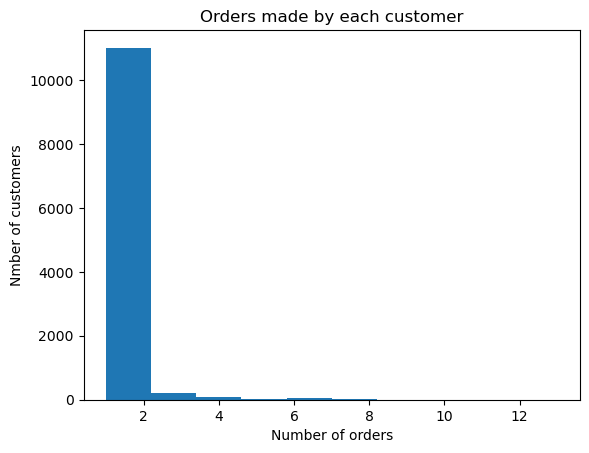

In [ ]:

orderdistr = df.groupby(['customer_id'])['customer_id'].count().reset_index(name='N.orders').sort_values(['N.orders'], ascending = False)
numorder=list(orderdistr["N.orders"])
plt.hist(x=numorder, orientation = "vertical")
plt.xlabel("Number of orders")
plt.ylabel('Nmber of customers')
plt.title('Orders made by each customer')

Text(0, 0.5, 'nuber of people per period')

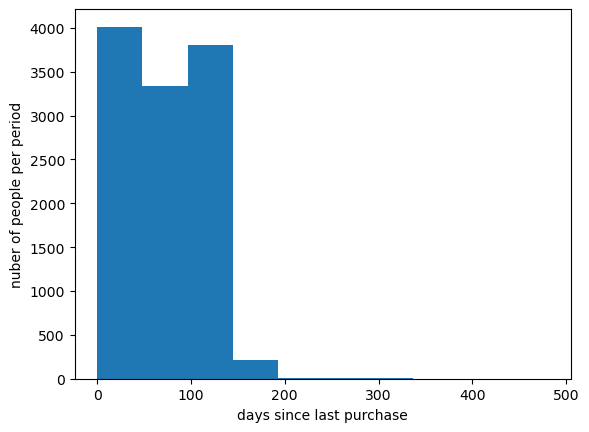

In [ ]:
recencydist=list(recency["Recency"])
plt.hist(x=recencydist)
plt.xlabel('days since last purchase')
plt.ylabel('number of people per period')
sns.histplot()

<AxesSubplot:xlabel='payment_installments', ylabel='Count'>

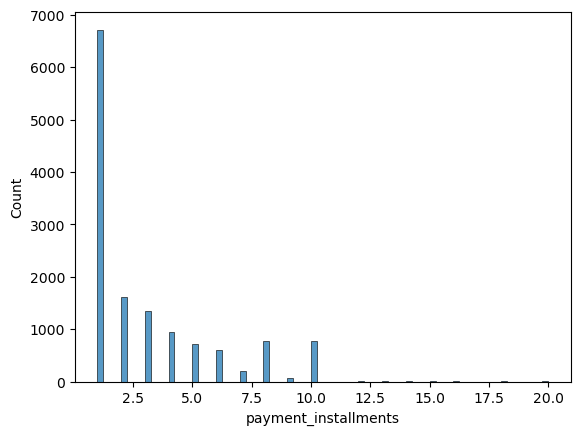

In [ ]:

sns.histplot(data=df["payment_installments"])

Of course something that may be of interest is the distribution of the payment types adn therefore see how people purchase products.

<AxesSubplot:xlabel='payment_type', ylabel='count'>

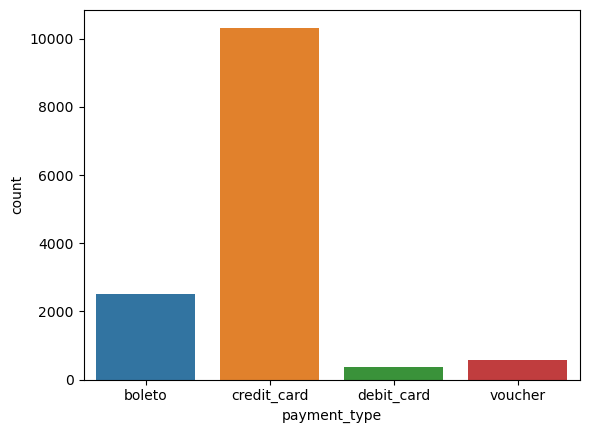

In [ ]:
sns.countplot(x=df["payment_type"])

Let us now see the top 15 product categories that customers have purchased

c:\Users\39339\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'bed_bath_table'),
 Text(1, 0, 'health_beauty'),
 Text(2, 0, 'housewares'),
 Text(3, 0, 'watches_gifts'),
 Text(4, 0, 'sports_leisure'),
 Text(5, 0, 'computers_accessories'),
 Text(6, 0, 'furniture_decor'),
 Text(7, 0, 'auto'),
 Text(8, 0, 'telephony'),
 Text(9, 0, 'garden_tools'),
 Text(10, 0, 'baby'),
 Text(11, 0, 'perfumery'),
 Text(12, 0, 'electronics'),
 Text(13, 0, 'toys'),
 Text(14, 0, 'pet_shop')]

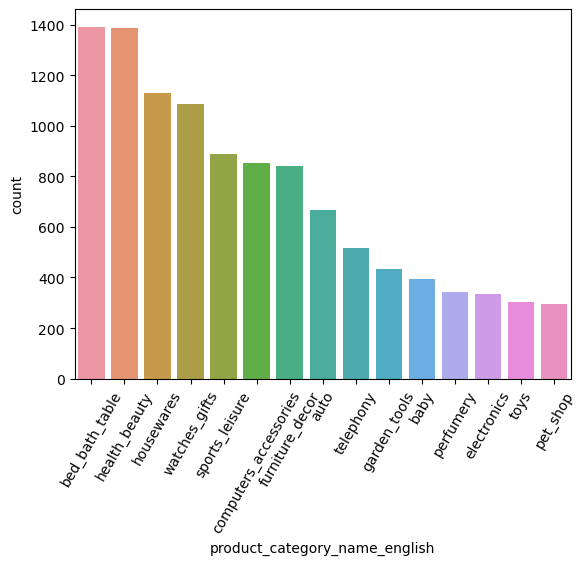

In [ ]:
dfcat = pd.value_counts(df['product_category_name_english']).iloc[:15].index 

ax = sns.countplot(df['product_category_name_english'], order= dfcat)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 60)

<AxesSubplot:ylabel='price'>

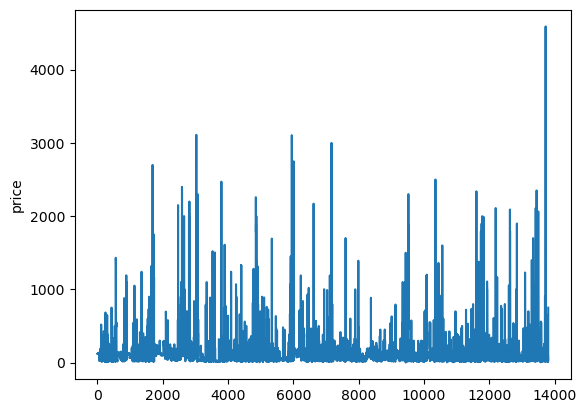

In [ ]:
y=df["price"]
x=[i for i in range(len(df))]
'''
plt.plot(x,y, color="#008080")
plt.xlabel("Index")
plt.ylabel("Price")
plt.title("Price Distribution") '''
sns.lineplot(data = rfm_dataset['Monetary value'],x=x,y=y)

<AxesSubplot:xlabel='Latest Purchase', ylabel='Monetary value'>

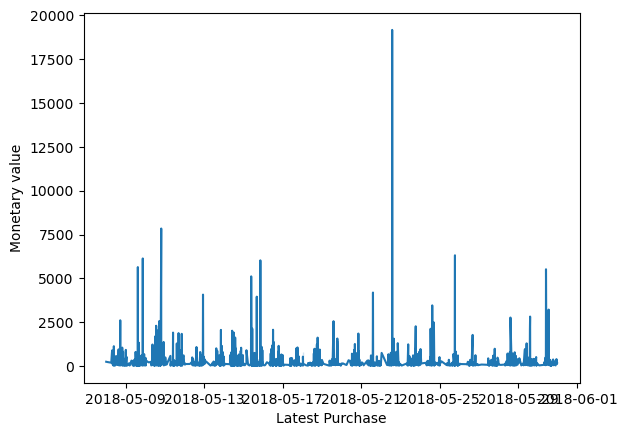

In [ ]:
Data1 = rfm_dataset[(rfm_dataset['Latest Purchase'] >= '2018-05-08') & ((rfm_dataset['Latest Purchase'] <= '2018-05-31'))]
sns.lineplot(data=Data1,
             x = Data1['Latest Purchase'], y= Data1['Monetary value'])


<AxesSubplot:xlabel='Latest Purchase', ylabel='Monetary value'>

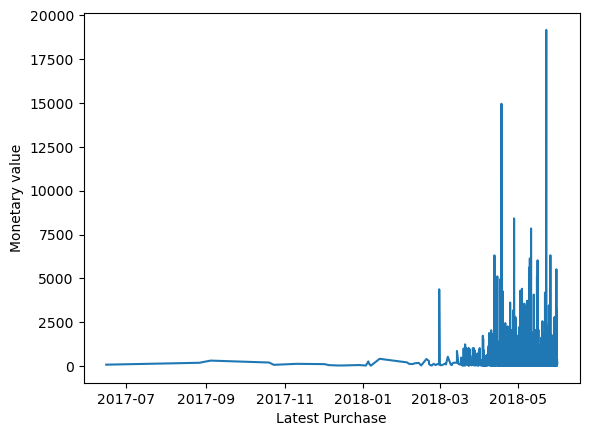

In [ ]:
Data1 = rfm_dataset[(rfm_dataset['Latest Purchase'] >= '2017-05-08') & ((rfm_dataset['Latest Purchase'] <= '2018-05-31'))]
sns.lineplot(data=Data1,
             x = Data1['Latest Purchase'], y= Data1['Monetary value']) 

Text(0.5, 1.0, 'Average Spending Distribution by Payment Type')

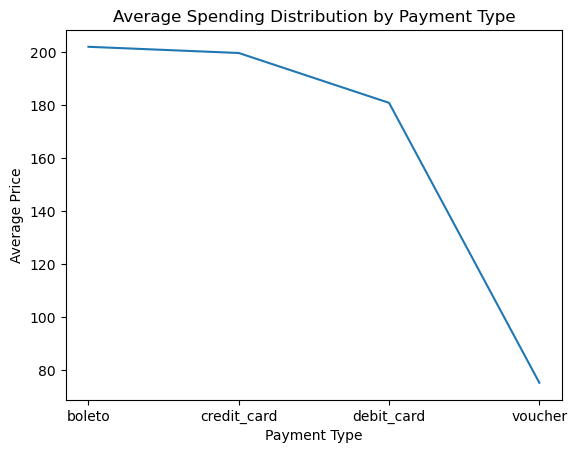

In [ ]:
paymentdistr = df.groupby(['payment_type'])['payment_value'].mean().reset_index(name='Avg_Spending').sort_values(['Avg_Spending'], ascending = False)
x=["boleto","credit_card","debit_card","voucher"]
y=paymentdistr["Avg_Spending"]
plt.plot(x,y)
plt.xlabel("Payment Type")
plt.ylabel("Average Price")
plt.title("Average Spending Distribution by Payment Type")

As you can see, people who have done an order with the voucher tend to spend less due to the promotion. Instead people who use a boleto spend much more. There isn't much difference between the credit card spending and the debit card while they spend a little bit less then users who use a boleto. This could be because there might be a promotion for those who use a credit or debit card. As we have seen before, the credit card is used much more and this then conferms that the credit card might have some advantages in terms of promotion or discounts.

What we can do now is to understand the distribution of the customers and how often they purchased. The group by function is grouping by the number of purchases and shows it in a different column!

Below we perform some data visualization to understand the distribution of the order and customers' ID, as we are eager to see if some customers have made constant orders.

In [ ]:
#sintassi per fare query  and = &, or= |




In [ ]:
firstpur = df.groupby(by = 'customer_id', as_index= False)['order_purchase_timestamp'].min()
lastpur = df.groupby(by = 'customer_id', as_index= False)['order_purchase_timestamp'].max()

#da aggiungere filter per ottenere prezzi corrispondenti al giorno.